In [2]:
#importing required modules
from keras.applications import VGG16
#loading the saved model
#we are using the complete architecture thus include_top=True
model = VGG16(weights='imagenet',include_top=True)
#show the summary of model
model.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [3]:
#creating a mapping of layer name ot layer details 
#we will create a dictionary layers_info which maps a layer name to its charcteristics
layers_info = {}
for i in model.layers:
    layers_info[i.name] = i.get_config()

#here the layer_weights dictionary will map every layer_name to its corresponding weights
layer_weights = {}
for i in model.layers:
    layer_weights[i.name] = i.get_weights()

print(layers_info['block5_conv1'])

{'name': 'block5_conv1', 'trainable': True, 'dtype': 'float32', 'filters': 512, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


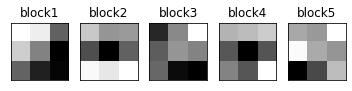

In [4]:
import matplotlib.pyplot as plt
layers = model.layers
layer_ids = [1,4,7,11,15]
#plot the filters
fig,ax = plt.subplots(nrows=1,ncols=5)
for i in range(5):
    ax[i].imshow(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='gray')
    ax[i].set_title('block'+str(i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [17]:
import numpy as np

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.activations import relu

%matplotlib inline
import matplotlib.pyplot as plt
def iter_occlusion(image, size=8):

    occlusion = np.full((size * 5, size * 5, 1), [0.5], np.float32)
    occlusion_center = np.full((size, size, 1), [0.5], np.float32)
    occlusion_padding = size * 2

    # print('padding...')
    image_padded = np.pad(image, ( \
                        (occlusion_padding, occlusion_padding), (occlusion_padding, occlusion_padding), (0, 0) \
                        ), 'constant', constant_values = 0.0)

    for y in range(occlusion_padding, image.shape[0] + occlusion_padding, size):

        for x in range(occlusion_padding, image.shape[1] + occlusion_padding, size):
            tmp = image_padded.copy()

            tmp[y - occlusion_padding:y + occlusion_center.shape[0] + occlusion_padding, \
                x - occlusion_padding:x + occlusion_center.shape[1] + occlusion_padding] \
                = occlusion

            tmp[y:y + occlusion_center.shape[0], x:x + occlusion_center.shape[1]] = occlusion_center

            yield x - occlusion_padding, y - occlusion_padding, \
                  tmp[occlusion_padding:tmp.shape[0] - occlusion_padding, occlusion_padding:tmp.shape[1] - occlusion_padding]

Text(0.5, 1.0, 'ORIGINAL IMAGE')

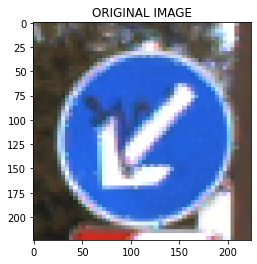

In [18]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('sign.png', target_size=(224, 224))
plt.imshow(image)
plt.title('ORIGINAL IMAGE')

(224, 224, 3)
0 0 0  -  (224, 224, 3)
14 0 1  -  (224, 224, 3)
28 0 2  -  (224, 224, 3)
42 0 3  -  (224, 224, 3)
56 0 4  -  (224, 224, 3)
70 0 5  -  (224, 224, 3)
84 0 6  -  (224, 224, 3)
98 0 7  -  (224, 224, 3)
112 0 8  -  (224, 224, 3)
126 0 9  -  (224, 224, 3)
140 0 10  -  (224, 224, 3)
154 0 11  -  (224, 224, 3)
168 0 12  -  (224, 224, 3)
182 0 13  -  (224, 224, 3)
196 0 14  -  (224, 224, 3)
210 0 15  -  (224, 224, 3)
0 14 16  -  (224, 224, 3)
14 14 17  -  (224, 224, 3)
28 14 18  -  (224, 224, 3)
42 14 19  -  (224, 224, 3)
56 14 20  -  (224, 224, 3)
70 14 21  -  (224, 224, 3)
84 14 22  -  (224, 224, 3)
98 14 23  -  (224, 224, 3)
112 14 24  -  (224, 224, 3)
126 14 25  -  (224, 224, 3)
140 14 26  -  (224, 224, 3)
154 14 27  -  (224, 224, 3)
168 14 28  -  (224, 224, 3)
182 14 29  -  (224, 224, 3)
196 14 30  -  (224, 224, 3)
210 14 31  -  (224, 224, 3)
0 28 32  -  (224, 224, 3)
14 28 33  -  (224, 224, 3)
28 28 34  -  (224, 224, 3)
42 28 35  -  (224, 224, 3)
56 28 36  -  (224, 224, 3)


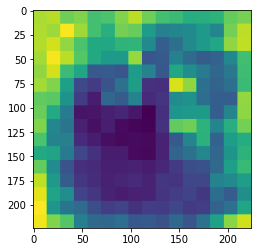

In [19]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
temp = image[0]
print(temp.shape)
heatmap = np.zeros((224,224))
correct_class = np.argmax(yhat)
for n,(x,y,image) in enumerate(iter_occlusion(temp,14)):
    heatmap[x:x+14,y:y+14] = model.predict(image.reshape((1, image.shape[0], image.shape[1], image.shape[2])))[0][correct_class]
    print(x,y,n,' - ',image.shape)
heatmap1 = heatmap/heatmap.max()
plt.imshow(heatmap)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


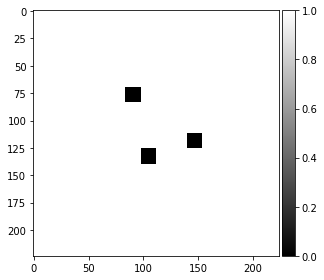

In [10]:
import skimage.io as io
#creating mask from the standardised heatmap probabilities
mask = heatmap1 < 0.85
mask1 = mask *256
mask = mask.astype(int)
io.imshow(mask,cmap='gray')

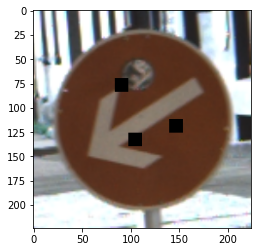

In [11]:
import cv2
#read the image
image = cv2.imread('sign.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#resize image to appropriate dimensions
image = cv2.resize(image,(224,224))
mask = mask.astype('uint8')
#apply the mask to the image
final = cv2.bitwise_and(image,image,mask = mask)
final = cv2.cvtColor(final,cv2.COLOR_BGR2RGB)
#plot the final image
plt.imshow(final)